# Part 2: Bootstrapping and Decision Trees (20 points)

In [3]:
using Pkg
Pkg.add("RDatasets")
Pkg.add("DataFrames")
Pkg.add("MLJDecisionTreeInterface")
Pkg.add("DecisionTree")
Pkg.add("StatsPlots")
Pkg.add("MLJ")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
   Installed libsodium_jll ──── v1.0.20+1
   Installed x264_jll ───────── v10164.0.0+0
   Installed ColorVectorSpace ─ v0.10.0
   Installed ZeroMQ_jll ─────── v4.3.5+1
   Installed FFMPEG ─────────── v0.2.4


In [30]:
using Pkg
Pkg.add("Statistics")
Pkg.add("GLM") 
Pkg.add("LinearAlgebra")
Pkg.add("Distributions")
Pkg.add("Plots")
Pkg.add("Random")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [37e2e46d] + LinearAlgebra
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [31c24e10] + Distributions v0.25.113
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
⌃ [91a5bcdd] + Plots v1.40.1
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


### 3. Consider the Hitters dataset provided by the ISLR package. This dataset contains several features related to the hitters of the Major League Baseball from the 1986 and 1987 seasons

In [1]:
using RDatasets, DataFrames
Hitters = dataset("ISLR", "Hitters")
println(Hitters)

322×20 DataFrame
 Row │ AtBat  Hits   HmRun  Runs   RBI    Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI   CWalks  League  Division  PutOuts  Assists  Errors  Salary       NewLeague 
     │ Int32  Int32  Int32  Int32  Int32  Int32  Int32  Int32   Int32  Int32   Int32  Int32  Int32   Cat…    Cat…      Int32    Int32    Int32   Float64?     Cat…      
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │   293     66      1     30     29     14      1     293     66       1     30     29      14  A       E             446       33      20  missing      A
   2 │   315     81      7     24     38     39     14    3449    835      69    321    414     375  N       W             632       43      10      475.0    N
   3 │   479    130     18     66     72     76      3    1624    457      63    224    266     263  A       W             880       82      14      480.0  

- Generate the dataset such that the categorical variables are transformed to dummies. Make sure you drop the missing observations if there is any. (2 pts)

In [2]:
Hitters = dropmissing(Hitters, :Salary);
Hitters.log_Salary = log.(Hitters.Salary)
select!(Hitters, Not(:Salary))

println(Hitters)

263×20 DataFrame
 Row │ AtBat  Hits   HmRun  Runs   RBI    Walks  Years  CAtBat  CHits  CHmRun  CRuns  CRBI   CWalks  League  Division  PutOuts  Assists  Errors  NewLeague  log_Salary 
     │ Int32  Int32  Int32  Int32  Int32  Int32  Int32  Int32   Int32  Int32   Int32  Int32  Int32   Cat…    Cat…      Int32    Int32    Int32   Cat…       Float64    
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │   315     81      7     24     38     39     14    3449    835      69    321    414     375  N       W             632       43      10  N             6.16331
   2 │   479    130     18     66     72     76      3    1624    457      63    224    266     263  A       W             880       82      14  A             6.17379
   3 │   496    141     20     65     78     37     11    5628   1575     225    828    838     354  N       E             200       11       3  

In [3]:
using MLJ
Y, X = unpack(Hitters, ==(:log_Salary), !=(:log_Salary));
schema(X)

Precompiling MLJ
  ✓ IntelOpenMP_jll
  ✓ oneTBB_jll
  ✓ MKL_jll
  ✓ MLJEnsembles
  ✓ MLJModels
  ✓ MLJBase
  ✓ StatisticalMeasures
  ✓ StatisticalMeasures → ScientificTypesExt
  ✓ MLJBase → DefaultMeasuresExt
  ✓ MLJFlow
  ✓ MLJIteration
  ✓ MLJBalancing
  ✓ MLJTuning
  ✓ MLJ
  14 dependencies successfully precompiled in 47 seconds. 180 already precompiled.


┌───────────┬───────────────┬─────────────────────────────────┐
│ names     │ scitypes      │ types                           │
├───────────┼───────────────┼─────────────────────────────────┤
│ AtBat     │ Count         │ Int32                           │
│ Hits      │ Count         │ Int32                           │
│ HmRun     │ Count         │ Int32                           │
│ Runs      │ Count         │ Int32                           │
│ RBI       │ Count         │ Int32                           │
│ Walks     │ Count         │ Int32                           │
│ Years     │ Count         │ Int32                           │
│ CAtBat    │ Count         │ Int32                           │
│ CHits     │ Count         │ Int32                           │
│ CHmRun    │ Count         │ Int32                           │
│ CRuns     │ Count         │ Int32                           │
│ CRBI      │ Count         │ Int32                           │
│ CWalks    │ Count         │ Int32     

In [ ]:
# Pkg.add("MLJModels")

   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [d491faf4] + MLJModels v0.17.4
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
  ✓ XSLT_jll
  ✓ Pango_jll
  ✓ Qt6ShaderTools_jll
  ✓ Qt6Declarative_jll
  4 dependencies successfully precompiled in 11 seconds. 347 already precompiled.


In [4]:
using MLJModels
onehotencoder = @load OneHotEncoder pkg=MLJModels verbosity=0

ohe = onehotencoder(features = [:League, :Division, :NewLeague])
ohe_machine = machine(ohe, X)
fit!(ohe_machine);
X = MLJ.transform(ohe_machine, X);

[ Info: Training machine(OneHotEncoder(features = [:League, :Division, :NewLeague], …), …).
[ Info: Spawning 2 sub-features to one-hot encode feature :League.
[ Info: Spawning 2 sub-features to one-hot encode feature :Division.
[ Info: Spawning 2 sub-features to one-hot encode feature :NewLeague.


In [5]:
coerce!(X, Count => Continuous);
X

Row,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League__A,League__N,Division__E,Division__W,PutOuts,Assists,Errors,NewLeague__A,NewLeague__N
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,0.0,1.0,0.0,1.0,632.0,43.0,10.0,0.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,1.0,0.0,0.0,1.0,880.0,82.0,14.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,0.0,1.0,1.0,0.0,200.0,11.0,3.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,0.0,1.0,1.0,0.0,805.0,40.0,4.0,0.0,1.0
5,594.0,169.0,4.0,74.0,51.0,35.0,11.0,4408.0,1133.0,19.0,501.0,336.0,194.0,1.0,0.0,0.0,1.0,282.0,421.0,25.0,1.0,0.0
6,185.0,37.0,1.0,23.0,8.0,21.0,2.0,214.0,42.0,1.0,30.0,9.0,24.0,0.0,1.0,1.0,0.0,76.0,127.0,7.0,1.0,0.0
7,298.0,73.0,0.0,24.0,24.0,7.0,3.0,509.0,108.0,0.0,41.0,37.0,12.0,1.0,0.0,0.0,1.0,121.0,283.0,9.0,1.0,0.0
8,323.0,81.0,6.0,26.0,32.0,8.0,2.0,341.0,86.0,6.0,32.0,34.0,8.0,0.0,1.0,0.0,1.0,143.0,290.0,19.0,0.0,1.0
9,401.0,92.0,17.0,49.0,66.0,65.0,13.0,5206.0,1332.0,253.0,784.0,890.0,866.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


- Divide the sample in two sets: training (90%) and testing (10%) sets. (2 pts)

In [8]:
train, test = partition(eachindex(Y), 0.9, rng = 1);

- Fit an OLS regression to predict the salary of the hitters using all the features of your dataset and provide bootstrap confidence intervals. Follow these steps:

Calculate the OLS point estimate using the training set $\hat{\beta}$. (2 pts)

In [15]:
using DataFrames

Y_df = DataFrame(Y=Y[train]);
train_sample = hcat(Y_df, X[train, :]);
train_sample

Row,Y,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League__A,League__N,Division__E,Division__W,PutOuts,Assists,Errors,NewLeague__A,NewLeague__N
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,5.72031,254.0,68.0,2.0,28.0,26.0,22.0,6.0,999.0,236.0,21.0,108.0,117.0,118.0,1.0,0.0,1.0,0.0,359.0,30.0,4.0,1.0,0.0
2,5.37064,466.0,108.0,33.0,75.0,86.0,72.0,3.0,652.0,142.0,44.0,102.0,109.0,102.0,1.0,0.0,1.0,0.0,286.0,8.0,8.0,1.0,0.0
3,7.06902,641.0,198.0,31.0,101.0,108.0,41.0,5.0,2129.0,610.0,92.0,297.0,319.0,117.0,1.0,0.0,1.0,0.0,269.0,17.0,10.0,1.0,0.0
4,7.17778,550.0,147.0,29.0,85.0,91.0,71.0,6.0,2816.0,815.0,117.0,405.0,474.0,319.0,1.0,0.0,0.0,1.0,1218.0,104.0,10.0,1.0,0.0
5,4.78749,408.0,117.0,11.0,66.0,41.0,34.0,1.0,408.0,117.0,11.0,66.0,41.0,34.0,0.0,1.0,0.0,1.0,942.0,72.0,11.0,0.0,1.0
6,6.46147,591.0,157.0,16.0,90.0,78.0,26.0,4.0,2020.0,541.0,52.0,310.0,226.0,91.0,0.0,1.0,1.0,0.0,290.0,440.0,25.0,0.0,1.0
7,6.38856,382.0,119.0,13.0,54.0,58.0,36.0,12.0,2133.0,594.0,41.0,287.0,294.0,227.0,0.0,1.0,0.0,1.0,59.0,156.0,9.0,0.0,1.0
8,4.65396,453.0,103.0,8.0,53.0,33.0,52.0,2.0,507.0,123.0,8.0,63.0,39.0,58.0,1.0,0.0,0.0,1.0,289.0,407.0,6.0,1.0,0.0
9,7.80792,495.0,151.0,17.0,61.0,84.0,78.0,10.0,5624.0,1679.0,275.0,884.0,1015.0,709.0,1.0,0.0,1.0,0.0,1045.0,88.0,13.0,1.0,0.0


In [28]:
using GLM
covariates = names(train_sample)[2:end];
model = lm(term(:Y) ~ sum(term.(covariates)), train_sample);
beta_hat = coef(model);
print(beta_hat)

[0.0, -0.003003080877000832, 0.013847980469040684, 0.014369266563085643, -0.002227253601035212, -0.002028846420315926, 0.011258456969750624, 0.059781031523779025, 0.00010254118657184797, -0.0005899254684643672, -0.0013200803815733894, 0.0016308420395938423, 0.0007514995532233017, -0.0015338443518260055, 0.0, 0.27471991362459414, 4.4054601743203055, 4.259218153915753, 0.0003326226842943833, 0.0006485774588877005, -0.013624896123758863, 0.14197210750688252, 0.0]

Use a loop to generate 10 000 bootstrap estimates. That is, sample 10 000 times pairs $(y_i, X_i)^{N_{train}}_{i=1}$ with replacement and, for each, estimate the vector of parameters $\hat{\beta}$. You must end up with an array of size (10 000,# features) that contains the sequence $\hat{\beta}_{boots} = (\hat{\beta}^{(1)}, \hat{\beta}^{(2)}, ..., \hat{\beta}^{(10000)})$ so each row is a bootstrapped vector of $\hat{\beta}$. (2 pts)

In [11]:
using GLM
using Random
using Statistics

M = 100_000

beta_hat_boost = zeros(M, length(beta_hat))

N = nrow(X[train, :])

# Realizar el proceso de bootstrap
for i in 1:M
    # Combinar X e Y en una sola matriz
    Z = hcat(Y[train], X[train, :])
    
    # Muestra aleatoria con reemplazo
    random_index = rand(1:N, N)
    Z_boost = Z[random_index, :] # Crear muestra bootstrap
    Z_covariates = names(Z_boost)[2:end];
    
    model_boost = lm(term(:x1) ~ sum(term.(Z_covariates)), Z_boost);
    
    # Guardar los coeficientes de la regresión bootstrap
    beta_hat_boost[i, :] = coef(model_boost)
end

Calculate the 95% confidence intervals $\hat{\beta}^{lower}_{boots}$ and $\hat{\beta}^{upper}_{boots}$ using the empirical approach. These are defined as follows:

$\hat{\beta}^{lower}_{boots} = \hat{\beta} - \hat{\beta}^{97.5}_{boots}$

$\hat{\beta}^{lower}_{boots} = \hat{\beta} - \hat{\beta}^{2.5}_{boots}$

where $\hat{\beta}^{\alpha}_{boots}$ is the $\alpha$% percentile of the $\hat{\beta}_{boots}$ distribution. (2pts)

In [53]:
# Calcular la diferencia entre los coeficientes originales y los de cada bootstrap
beta_hat = transpose(beta_hat)
delta = beta_hat .- beta_hat_boost

100000×23 Matrix{Float64}:
 -4.54258  -0.000116867   0.000368959  …   0.141972    -0.132845
 -3.91358  -0.000589191  -0.00110131      -0.314114     0.0
 -4.19746  -0.000945691  -0.00180177      -0.0436376    0.0
  0.0      -0.00146977    0.00436511       0.209523     0.0
  0.0       0.00154367   -0.00301841       0.141972     0.0879768
  0.0       0.000524476   0.00208854   …  -0.0802206    0.0
 -4.06911  -0.00103314    0.00438971      -0.125298     0.0
  0.0      -0.000460281  -0.00219494      -0.390722     0.0
 -4.03507  -0.000557409   0.0040572       -0.188559     0.0
  0.0       0.0016006    -0.00477354      -4.26966     -4.32369
  0.0      -0.000168537  -0.00868767   …   0.141972    -0.180641
  0.0       0.000336667  -0.00356504      -0.250241     0.0
 -4.73357  -0.00364689    0.0121299        0.141972     0.0733913
  ⋮                                    ⋱               
  0.0      -0.00460531    0.00921421      -0.066178     0.0
 -4.44622   0.000179302  -0.00159684      -0.125358

In [ ]:
# Calcular los intervalos de confianza de Hall

lower_bound_boost_emp = quantile(delta, 0.975, dims=1)  
upper_bound_boost_emp = quantile(delta, 0.025, dims=1)

lower_bound_boost_emp = lower_bound_boost_emp[1, :]
upper_bound_boost_emp = upper_bound_boost_emp[1, :]

lower_bound_boost_emp = beta_hat .- lower_bound_boost_emp
upper_bound_boost_emp = beta_hat .- upper_bound_boost_emp

LoadError: MethodError: no method matching quantile!(::Matrix{Float64}, ::Float64; sorted::Bool, alpha::Float64, beta::Float64)

[0mClosest candidates are:
[0m  quantile!([91m::AbstractVector[39m, ::Real; sorted, alpha, beta)
[0m[90m   @[39m [36mStatistics[39m [90m/Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Statistics/src/[39m[90m[4mStatistics.jl:976[24m[39m
[0m  quantile!(::AbstractArray, [91m::AbstractVector[39m, [91m::AbstractArray[39m; sorted, alpha, beta)
[0m[90m   @[39m [36mStatistics[39m [90m/Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Statistics/src/[39m[90m[4mStatistics.jl:943[24m[39m
[0m  quantile!(::AbstractArray, [91m::AbstractArray[39m, [91m::Union{Tuple{Vararg{Real}}, AbstractArray}[39m; sorted, alpha, beta)
[0m[90m   @[39m [36mStatistics[39m [90m/Applications/Julia-1.10.app/Contents/Resources/julia/share/julia/stdlib/v1.10/Statistics/src/[39m[90m[4mStatistics.jl:972[24m[39m
[0m  ...


Calculate the out of sample mean squared error of the model

- Fit a regression tree to predict the salary using all the features of your dataset. Follow these steps:

Using the training data, fit a tree and prune it. To choose the prunning parameter, cross validate it as we did in class. (4 pts)

In [ ]:
using MLJDecisionTreeInterface
tree_model_prune = DecisionTreeRegressor(post_prune = true, merge_purity_threshold = 0.09)
tree_machine_prune = machine(tree_model_prune, X[train, :], Y[train])
fit!(tree_machine_prune);

[ Info: Training machine(DecisionTreeRegressor(max_depth = -1, …), …).


In [26]:
thresholds = exp.(collect(-10:0.01:0))
rmses = []

for threshold in thresholds
        tree_model_prune.merge_purity_threshold = threshold
        evaluation = evaluate!(
                tree_machine_prune,
                resampling = CV(nfolds = 3, shuffle = true, rng = 123),
                measure = rmse
        )
        rmses = [rmses; evaluation.measurement]
end

Evaluating over 3 folds: 100%[=========================] Time: 0:00:02


[ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
Precompiling FileIOExt
  ✓ XSLT_jll
  ✓ Qt6ShaderTools_jll
  ✓ Qt6Declarative_jll
  ✓ Pango_jll
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  6 dependencies successfully precompiled in 162 seconds. 180 already precompiled.
[ Info: Precompiling FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c]
┌ Warning: Module Plots with build ID fafbfcfd-8101-6801-0006-524a3101997d is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(false). Importing FileIOExt [f5f51d8f-5827-5d2e-939b-192fcd6ec70c].
Precompiling IJuliaExt
  ✓ Plots → IJuliaExt
  1 dependency successfully precompiled in 4 seconds. 193 already precompiled.
[ Info: Precompiling IJuliaExt [2f4121a4-3b3a-5ce6-9c5e-1f2673ce168a]
┌ Warning: Module Plots with build ID fafbfcfd-8101-6801-0006

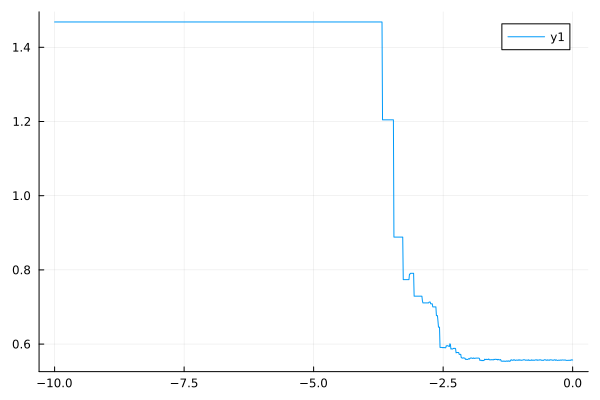

In [28]:
using StatsPlots
plot(log.(thresholds), rmses)

Calculate the out of sample mean squared error of the model. (2 pts)

In [ ]:
optimal_alpha = thresholds[argmin(rmses)]
tree_model_prune = DecisionTreeRegressor(post_prune = true, merge_purity_threshold = thresholds[argmin(rmses)])
tree_machine_prune = machine(tree_model_prune, X[train, :], Y[train])
fit!(tree_machine_prune);
predictions_prune = predict(tree_machine_prune, X[test, :])
mse_tree = mean((predictions_prune - Y[test]).^2)

# Suponiendo que ya tienes calculado el mse_tree
println("Out-of-sample Mean Squared Error of the Regression Tree: ", mse_tree)

[ Info: Training machine(DecisionTreeRegressor(max_depth = -1, …), …).


Out-of-sample Mean Squared Error of the Regression Tree: 0.37902775358251467


- Which model performs better in terms of predictive accuracy? (2 pts) 

##### In terms of power and predictive accuracy, the regression tree using cross validation to find the optimal pruning parameter has better performance than using bootsrap regression. This may be because the sample size used is not small enough to best take advantage of the benefits of bootstrap. As evidenced in Rezazadeh et. al (2019), when the data generating process is unknown and the sample size is larger, regression trees fit better than other predictive methods. Bootstrap is more useful in small samples, where access to more information is limited, which does not seem to be the case with the base used.